In [40]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import InputLayer, Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
# DF = pd.read_csv("C:/Users/mohan/keystroke.csv",header=None)
DF = pd.read_csv("keystroke.csv",header=None)


D:\SOFTWARES\ANACONDA_3\envs\SOUMYA_CMU\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
DF.columns = DF.iloc[0]
DF=DF.drop([0], axis=0)
DF=DF.drop(['sessionIndex', 'rep'], axis=1)
print(DF)

0     subject H.period DD.period.t UD.period.t     H.t  DD.t.i  UD.t.i  \
1        s002   0.1491      0.3979      0.2488  0.1069  0.1674  0.0605   
2        s002   0.1111      0.3451       0.234  0.0694  0.1283  0.0589   
3        s002   0.1328      0.2072      0.0744  0.0731  0.1291   0.056   
4        s002   0.1291      0.2515      0.1224  0.1059  0.2495  0.1436   
5        s002   0.1249      0.2317      0.1068  0.0895  0.1676  0.0781   
...       ...      ...         ...         ...     ...     ...     ...   
20396    s057   0.0884      0.0685     -0.0199  0.1095   0.129  0.0195   
20397    s057   0.0655       0.063     -0.0025   0.091  0.1148  0.0238   
20398    s057   0.0939      0.1189       0.025  0.1008  0.1122  0.0114   
20399    s057   0.0923      0.1294      0.0371  0.0913   0.099  0.0077   
20400    s057   0.0596       0.131      0.0714  0.0992  0.1103  0.0111   

0         H.i  DD.i.e  UD.i.e  ...     H.a  DD.a.n  UD.a.n     H.n  DD.n.l  \
1      0.1169  0.2212  0.1043  ..

In [42]:
X=DF.iloc[:,1:32].values
Y=DF.iloc[:,0].values.reshape(-1, 1)

In [43]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [44]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y).toarray()

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)

(16320, 31)


In [46]:

# model=Sequential()
# model.add(Dense(40, input_dim=31, activation='relu'))
# model.add(Dense(30, activation='sigmoid'))
# model.add(Dense(51, activation='softmax'))
# model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# #Y_train1= keras.utils.to_categorical(Y_train)
# model.fit(X_train, Y_train, epochs=350, batch_size=10)

#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
hidden1=50
Act1='relu'
hidden2=50
Act2='relu'
hidden3=51
Act3='softmax'
hidden4=0
Act4=0
hidden5=0
Act5=0

model = Sequential()
model.add(Dense(hidden1, input_dim=31, activation=Act1))
model.add(Dense(hidden2, activation=Act2))
model.add(Dense(hidden3, activation=Act3))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [47]:
# history = model.fit(X_train, Y_train, epochs=100, batch_size=64)

In [48]:
# #On Test
# Y_pred = model.predict(X_test)
# #Converting predictions to label
# pred = list()
# for i in range(len(Y_pred)):
#     pred.append(np.argmax(Y_pred[i]))
# #Converting one hot encoded test label to label
# test = list()
# for i in range(len(Y_test)):
#     test.append(np.argmax(Y_test[i]))
# from sklearn.metrics import accuracy_score
# a = accuracy_score(pred,test)
# print('Accuracy is:', a*100)

In [56]:
Epoch_val=2
Batch_Sze=64
history = model.fit(X_train, Y_train,validation_data = (X_test,Y_test), 
                    epochs=Epoch_val, batch_size=Batch_Sze, verbose=2)

Train on 16320 samples, validate on 4080 samples
Epoch 1/2
 - 1s - loss: 0.4791 - acc: 0.8669 - val_loss: 0.5056 - val_acc: 0.8527
Epoch 2/2
 - 1s - loss: 0.4529 - acc: 0.8734 - val_loss: 0.4867 - val_acc: 0.8610


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epoch')]

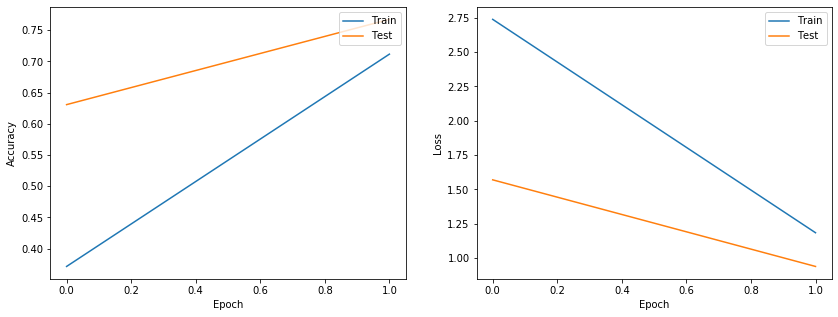

In [50]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(14, 5)
ax1.plot(history.history['acc'], label='Train')
ax1.plot(history.history['val_acc'], label='Test')
ax1.legend(loc="upper right")
#ax1.set_title('Model accuracy')
#ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.set(xlabel='Epoch',ylabel='Accuracy')
ax2.plot(history.history['loss'], label='Train') 
ax2.plot(history.history['val_loss'], label='Test') 
ax2.legend(loc="upper right")
#ax2.set_title('Model loss')
ax2.set(xlabel='Epoch', ylabel='Loss')


In [52]:
#Df_result=pd.read_csv("C:/CMU_SEM1/ML_AI/Project/Result_data.csv")

row = [Epoch_val, Batch_Sze, hidden1,Act1, hidden2,Act2, hidden3,Act3, hidden4,Act4, hidden5,Act5,
       history.history['acc'][0],history.history['loss'][0],
       history.history['val_acc'][0],history.history['val_loss'][0]]

with open('Result_data.csv', 'a',newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(row)
csvFile.close()